Import Wave_Module and the dataset.

In [1]:
sys.path.append(r'D:\Academics\Thesis\Paper\Code\Validation')  # Use this to add the path of the Wave_Module to your system

from Wave_Module import Input

# The first file in **Set 1** in named 2003.10.22.12.06.24
data_set = Input(r'D:\Academics\Thesis\DataBases\IMS\1st_test\2003.10.22.12.06.24')

Choose your prefered channel and create the data.

In [2]:
import numpy

wave_data = data_set['channel5'].to_numpy()  # Channel 5 is the first channel for Bearing 3

Create the wave object with **wave** class.

In [3]:
from Wave_Module import wave

wave_object = wave(data=wave_data, Fs=20000)

Use **time** method to plot your waveform.

Text(0.5, 0, 'Time (s)')

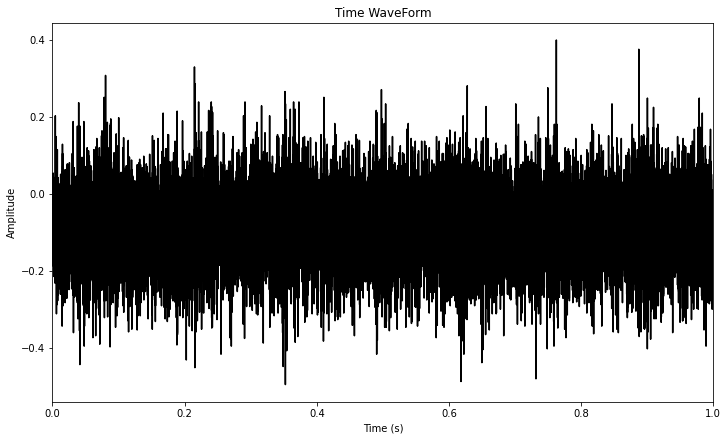

In [4]:
import matplotlib.pyplot as plt

wave_time = wave_object.time()

############## Plotting the Time WaveForm ##################
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 6))

ax.set_title('Time WaveForm')
ax.plot(wave_time, wave_data, color='k')
ax.set_xlim(0,1)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time (s)')

Use FFT method to plot the **FFT Spectrum** of the waveform.

Text(0, 0.5, 'Frequency Domain Magnitude')

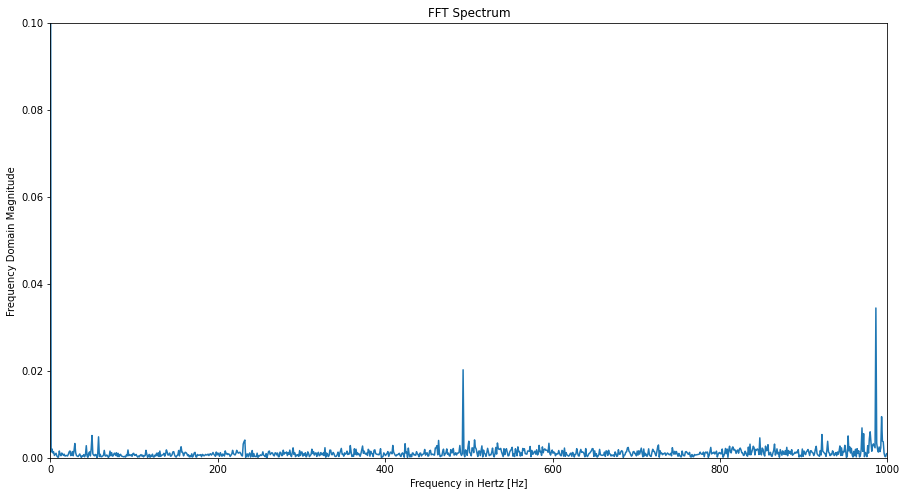

In [5]:
freqs, mags = wave_object.FFT()  # Returns frequencies and their presented magnitudes

############# Plotting the FFT Spectrum ####################
plt.figure(figsize=(15,8))

plt.title('FFT Spectrum')
plt.plot(freqs, mags)
plt.ylim(0, 0.1)
plt.xlim(0, 1000)
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain Magnitude')

Use Peaks method to plot the peaks on the FFT spectrum.

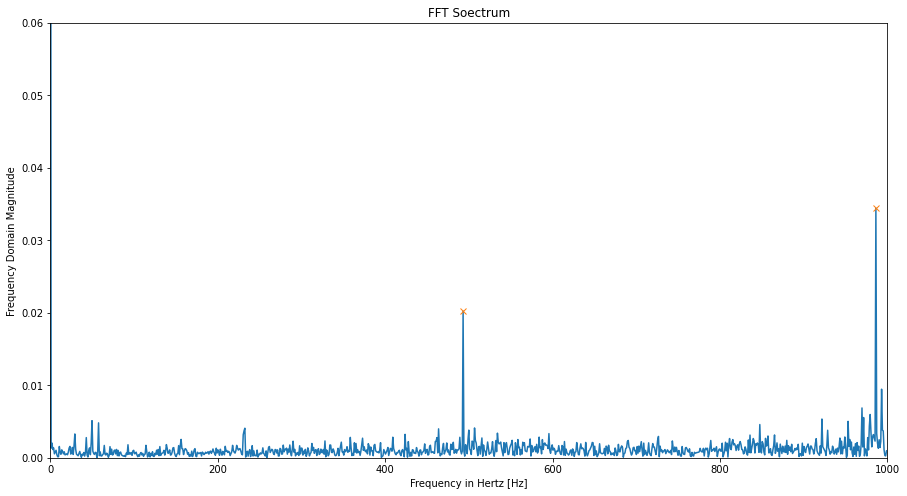

In [6]:
peaks = wave_object.peaks(prominence= 100)  # Healthy peaks location

# N is equal to Fs/L where L (number of data points 20,480) and Fs (Sample Rate 20000 Hz) do not change in different data
N = 20000/20480

########## Plotting the FFT Spectrum with peaks ############
plt.figure(figsize=(15,8))

plt.title('FFT Soectrum')
plt.plot(freqs, mags)
plt.ylim(0, 0.06)
plt.xlim(0, 1000)
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain Magnitude')
plt.plot(peaks, mags[[int(i) for i in peaks/N]], "x")

Use nested envelope class to calculate enveloped waveform and its FFT.

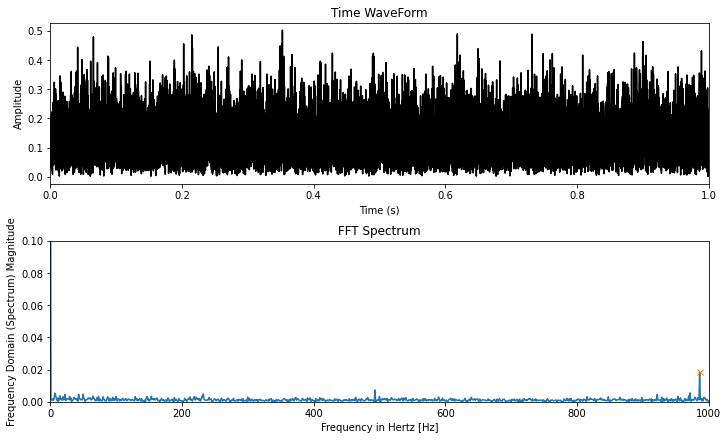

In [8]:
env_wave = wave_object.envelope('waveform')
env_freqs, env_mags = wave_object.envelope('FFT')
env_peaks = wave_object.envelope('peaks')

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10, 6))

############## Enveloped Time WaveForm ##################
ax1.set_title('Time WaveForm')
ax1.plot(wave_time, env_wave, color='k')
ax1.set_xlim(0,1)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (s)')

############# Enveloped FFT Spectrum ####################
ax2.set_title('FFT Spectrum')
ax2.plot(env_freqs, env_mags)
ax2.set_ylim(0, 0.6)
ax2.set_xlim(0, 1000)
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Frequency Domain (Spectrum) Magnitude')
plt.plot(env_peaks, env_mags[[int(i) for i in env_peaks/N]], "x")